In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = dataset.iloc[:, 3:5].values

In [4]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV


In [11]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
param_grid = {
    'bandwidth': np.arange(1.0, 5.0, 0.5)
}

ms = MeanShift(bandwidth=bandwidth,bin_seeding=True)

# Set up GridSearchCV with the Silhouette score as the scoring metric
# The 'silhouette_score' is an example of a suitable metric for clustering
silhouette_scorer = make_scorer(silhouette_score)
# Set up GridSearchCV with the custom scorer
grid_search = GridSearchCV(
    estimator=ms,
    param_grid=param_grid,
    scoring=silhouette_scorer,
    cv=3,  # Cross-validation splits
    n_jobs=-1  # Use all available CPU cores
)
grid_search.fit(X)
# Now, access the best model found by the grid search
best_mean_shift_model = grid_search.best_estimator_

labels = best_mean_shift_model.labels_
cluster_centers = best_mean_shift_model.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
labels

C:\Users\gssan\anaconda3\envs\aiml\Lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


array([171, 170, 169, 168, 167, 166, 165, 164, 163, 161, 162, 160, 158,
       157, 159, 156, 155, 154, 153, 152, 151,  22, 150,  22, 149, 146,
       148, 147, 145, 144, 143, 142, 141, 138, 140, 139, 137, 136, 135,
       134, 133, 132, 130, 129, 131, 128, 126, 127,  21,  21, 125,  20,
       122,  20, 123, 124, 120, 121, 118, 119,  19,  19, 117,   6,  17,
         6,  17,  18,   6,  18, 115, 116, 114, 113,   5,   3,   4,   5,
         4,  16,   4,   3,  16, 112, 111,   5, 109, 110, 107, 108, 105,
       106,   2, 104,  15, 102, 103,   2,  15,   2,   1,  13, 101,  14,
        14,   1,  99,  12, 100,  13,  98,  97,  96,  12,  94,  93,  95,
        92,  90,  11,  11,  91,  89,  88,  87,  86,  83,  82,  84,  10,
        85,  10,  81,  80,  79,  76,  78,  77,  75,  74,  73,  72,  71,
        70,  69,  66,  68,  67,  64,   0,   8,   0,  65,  62,   8,   0,
         9,  61,   9,  63,  60,  59,  58,  57,  56,  55,  54,  53,  51,
        50,   7,  49,  52,  48,   7,  45,  47,  46,  44,  43,  4

In [12]:

# Print the best bandwidth and the corresponding Silhouette score
print("Best bandwidth found: ", grid_search.best_params_['bandwidth'])
print("Best Silhouette Score: ", grid_search.best_score_)
print("number of estimated clusters : %d" % n_clusters_)

Best bandwidth found:  1.0
Best Silhouette Score:  nan
number of estimated clusters : 172


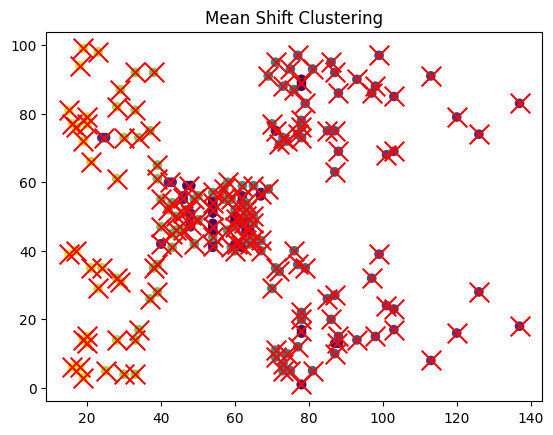

In [6]:
# Plot 1
plt.scatter(X[:,0], X[:,1], c=labels)
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', color='red', s=200)
plt.title("Mean Shift Clustering")
plt.show()

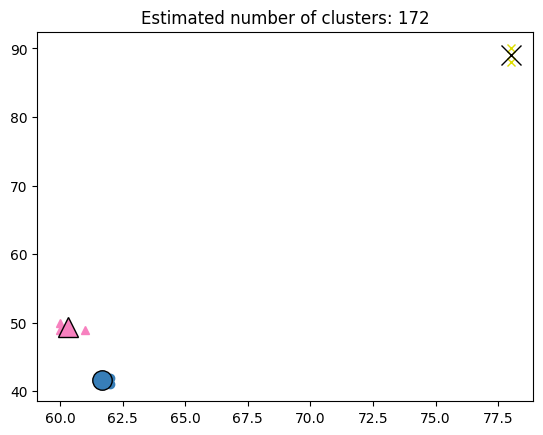

In [7]:
# Plot 2
plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf"]
markers = ["x", "o", "^"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()


In [8]:
supervised=dataset
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


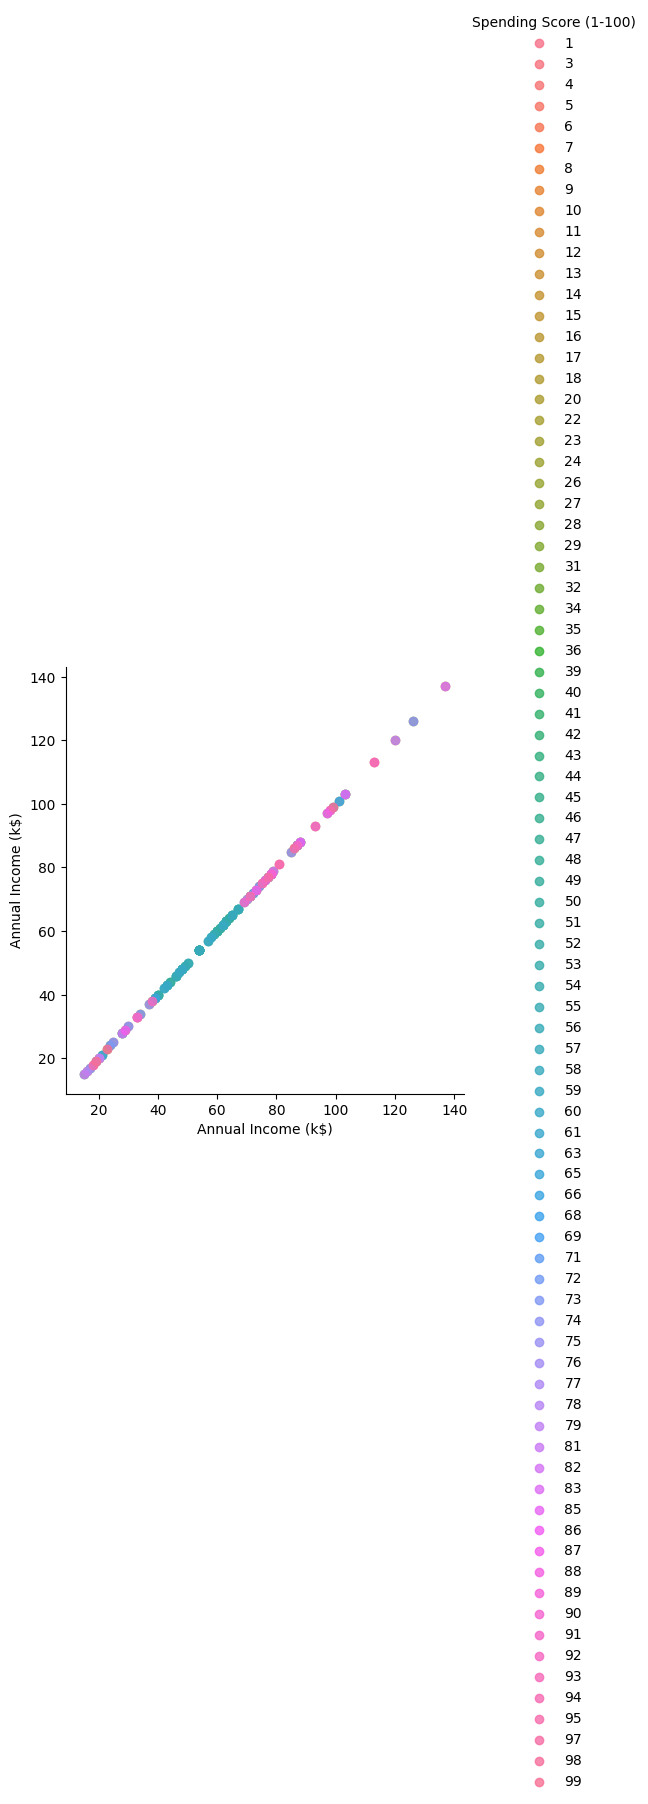

In [9]:
import seaborn as sns
facet = sns.lmplot(data=supervised, x=supervised.columns[3], y=supervised.columns[3], hue=supervised.columns[4],
                   fit_reg=False, legend=True, facet_kws={"legend_out": True})